# ***Data Science com Python***
## Modelagem e Avaliação de Resutados - Clustering
### Camila Teixeira

Professor: Lucas Roberto Correa

Estudo de caso: Base de dados de pessoas que um banco entrou em contato para oferecer um investimento. Nessa base consta quem já aceitou e quem não aceitou fazer o investimento.

## Import dos pacotes

In [1]:
# processamento dos dados
import pandas as pd

# visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# pre processamento dos dados
from sklearn.preprocessing import StandardScaler

# modelos de agrupamento
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# metricas
from sklearn.metrics import silhouette_score

# limpeza de memoria
import gc

# configs do pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
metadados = pd.read_excel('metadata.xlsx')

In [3]:
metadados

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


In [4]:
dados = pd.read_csv('new_train.csv', sep=',')

In [5]:
dados.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


## Removendo a target para trabalharmos com a base em um problema não supervisionado

In [6]:
explicativas = dados.drop(columns='y', axis=1).copy()

In [7]:
explicativas.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

## Separando as explicativas categóricas e numéricas

In [8]:
explicativas.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

In [9]:
expl_cat = explicativas[['job',
'marital',
'education',
'default',
'housing',
'loan',
'contact',
'month',
'day_of_week',
'poutcome']].copy()

In [10]:
expl_num = explicativas[['age', 'duration','campaign','pdays','previous']]

In [11]:
expl_num.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


In [12]:
expl_num.isnull().sum()

age         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

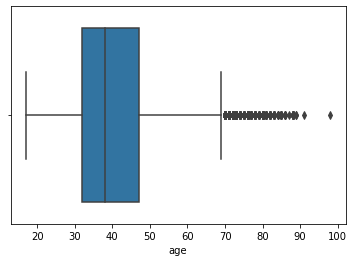

In [15]:
sns.boxplot(x=expl_num['age']);

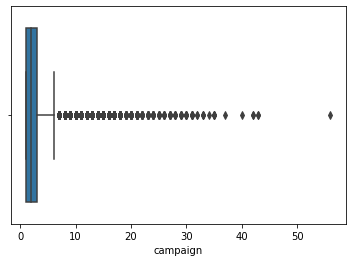

In [16]:
sns.boxplot(x=expl_num['campaign']);

## Transformação dos dados com padronização

z = (x - u) / s

onde 'u' é média na amostra de treinamento, 's' é desvio padrão da amostra


In [17]:
scale = StandardScaler()

In [18]:
scale

StandardScaler()

In [19]:
expl_num_scale = scale.fit_transform(expl_num)

In [20]:
expl_num_scale

array([[ 0.86373877, -0.12019627,  0.52298128,  0.19658384, -0.35012691],
       [-0.28972159, -0.2167318 , -0.20368791,  0.19658384,  1.65381294],
       [ 3.65126795,  3.43617293, -0.56702251,  0.19658384, -0.35012691],
       ...,
       [ 1.34434725, -0.49089273,  0.52298128,  0.19658384, -0.35012691],
       [-1.05869515, -0.3596044 , -0.56702251,  0.19658384, -0.35012691],
       [-0.48196498,  1.10387435,  0.15964669,  0.19658384, -0.35012691]])

## O algoritmo

In [21]:
km = KMeans(n_clusters=5,
            random_state=42)

In [22]:
agg = AgglomerativeClustering(n_clusters=5)

## Rodar o agrupamento nos dados

In [23]:
explicativas['kmeans_05'] = km.fit_predict(expl_num_scale)

In [24]:
explicativas.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,kmeans_05
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,1
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,3
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,1


In [25]:
explicativas['kmeans_05'].value_counts()

0    17407
1    10086
3     2881
4     1339
2     1237
Name: kmeans_05, dtype: int64

In [26]:
explicativas['agg_05'] = agg.fit_predict(expl_num_scale)

In [27]:
explicativas.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,kmeans_05,agg_05
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,1,2
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0,4
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,3,0
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0,1
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,1,0


In [28]:
explicativas['agg_05'].value_counts()

1    16359
0     9030
4     3197
2     3139
3     1225
Name: agg_05, dtype: int64

## Métrica de qualidade do agrupamento

In [29]:
num_clusters = [2,3,4,5,8,9,10]

for n_cluster in num_clusters:
  clusters = KMeans(n_clusters=n_cluster)
  predicao = clusters.fit_predict(expl_num_scale)

  score = silhouette_score(expl_num_scale, predicao)
  print("O valor do silhouette_score é {}, para n_clusters: {}".format(score, n_cluster))

O valor do silhouette_score é 0.6709876132178245, para n_clusters: 2
O valor do silhouette_score é 0.28172204182314836, para n_clusters: 3
O valor do silhouette_score é 0.30421730526038193, para n_clusters: 4
O valor do silhouette_score é 0.3361256991924962, para n_clusters: 5
O valor do silhouette_score é 0.36569034932591393, para n_clusters: 8
O valor do silhouette_score é 0.2975939986280215, para n_clusters: 9
O valor do silhouette_score é 0.29770962224697745, para n_clusters: 10


## Exercício

### Fazer a mesma estrutura de silhouette_score para o agrupamento por Agglomerative.



In [30]:
num_cluster = [2,4,6,8,10]

for n_cluster in num_cluster:
  modelo = AgglomerativeClustering(n_clusters=n_cluster)
  resultado = modelo.fit_predict(expl_num_scale)

  score = silhouette_score(expl_num_scale, resultado)

  print("O valor de silhouette_score é: {} e o número de clusters selecionado é {}".format(score, n_cluster))

O valor de silhouette_score é: 0.6706645703024579 e o numero de clusters selecionado é 2
O valor de silhouette_score é: 0.2817831797078603 e o numero de clusters selecionado é 4
O valor de silhouette_score é: 0.3396806576738192 e o numero de clusters selecionado é 6
O valor de silhouette_score é: 0.2939206225828426 e o numero de clusters selecionado é 8
O valor de silhouette_score é: 0.2896214099319117 e o numero de clusters selecionado é 10


**Pode-se constatar que o silhouette_score com uma quebra de 2 (0.6706) é o ideal. Isso faz sentido porque essa base retrata o dois cenário oposto em que o cliente aceita ou não a proposta do banco.**

## Avaliação dos resultados analisando as variáveis categóricas

In [31]:
explicativas.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,kmeans_05,agg_05
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,1,2
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0,4
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,3,0
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0,1
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,1,0


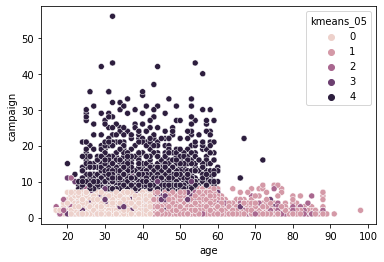

In [33]:
sns.scatterplot(data=explicativas,
                x='age',
                y='campaign',
                hue='kmeans_05');

**Observa-se que o grupo zero é formado por clientes de campaign até 10 e idade inferior a 42 anos enquanto o grupo 1 é composto por clientes de campaign também inferior a 10 mais de idade superior a 42 anos. Já o grupo 4 é formado por clientes de campaign superior a 10 e de idade diversa.**

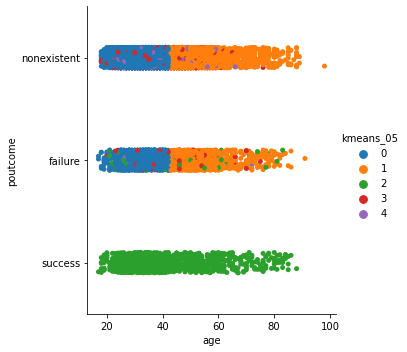

In [34]:
sns.catplot(x='age',
            y='poutcome',
            hue='kmeans_05',
            data=explicativas);

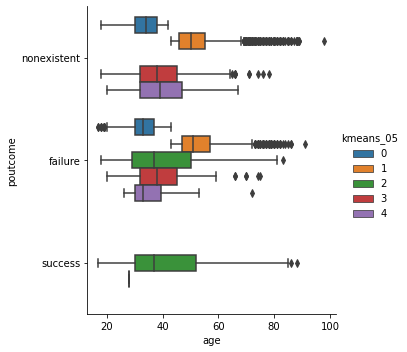

In [35]:
sns.catplot(x='age',
            y='poutcome',
            hue='kmeans_05',
            kind='box',
            data=explicativas);

**O grupo 2 foi o único em que a maioria dos clientes a última campaign resultou em success independente da idade.
Já o grupo zero que tem uma idade inferior a 40 anos situaram-se entre failure e nonexistent.**

In [36]:
metadados

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


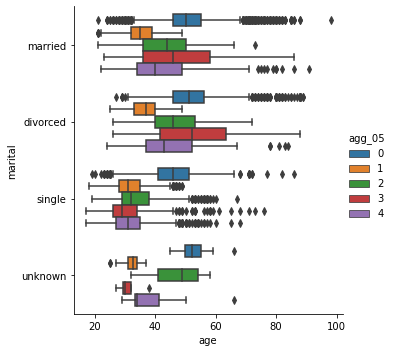

In [37]:
sns.catplot(x='age',
            y='marital',
            hue='agg_05',
            kind='box',
            data=explicativas);

**Não foi possível ananlisar apropriadamente a variável estado civil pois tanto o agrupamento kmeans e para o agg não conseguiram separar muito bem a variável. Os cinco agrupamentos estão presentes em todos os estados civis.**

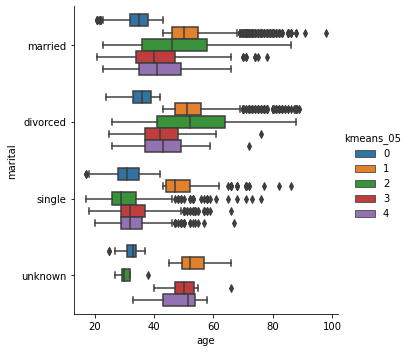

In [38]:
sns.catplot(x='age',
            y='marital',
            hue='kmeans_05',
            kind='box',
            data=explicativas);

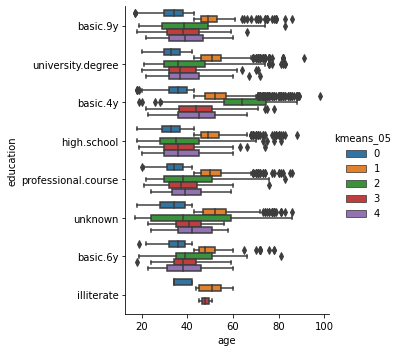

In [39]:
sns.catplot(x='age',
            y='education',
            hue='kmeans_05',
            kind='box',
            data=explicativas);

**Os grupos formados também não foram eficazes para criar um grupo que pertença a somente um nível de educação específico.**

In [40]:
explicativas.groupby(['marital','kmeans_05']).size().unstack()

kmeans_05,0,1,2,3,4
marital,,,,,
divorced,1418,1700,109,295,153
married,9263,7498,647,1740,805
single,6693,873,477,839,375
unknown,33,15,4,7,6


**Ao aplicar a contagem de número de clientes em cada cluster é possível inferir que em geral o grupo 1 é formado por uma maioria de pessoas casadas.**

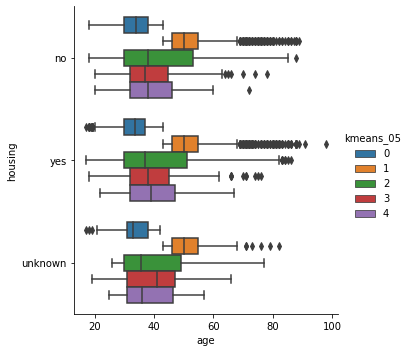

In [41]:
sns.catplot(x='age',
            y='housing',
            hue='kmeans_05',
            kind='box',
            data=explicativas);

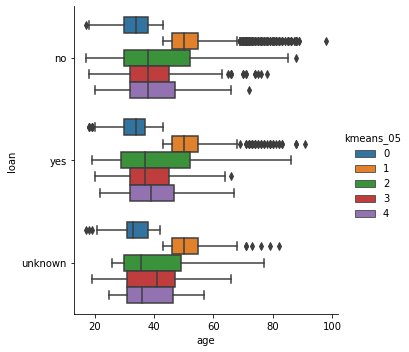

In [42]:
sns.catplot(x='age',
            y='loan',
            hue='kmeans_05',
            kind='box',
            data=explicativas);